# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

For the Battle of Neighborhoods assignment, I've chosen the provided prompt of 
 > In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it?
 
A person looking to open a restaurant in Berlin will have to make many decisions while scouting a location. One of the factors to consider when choosing a location of a restaurant is the profile of the neighborhood. A hip fusion cuisine migh not fit well into a neighborhood populated mostly by retirees. A pizza place might struggle in a neighborhood with a high concentration of other pizza places. A coffee shop could do well in a popular tourist spot. 

## Data <a name="data"></a>

Let's say the restaurant owner is interested in answering these questions:
 - What is the age profile of the residents? 
 - What competition exists in the vicinity? 
 - Are there other venues people might go to in the vicinity and then opt to grab a bite nearby? 

To try to answer these questions, I'll be working with demographic data of Berlin's residents along with the existing venue data from Forsquare to analyze the neighborhoods and create different neighborhood profiles to assess the locations. I aim to categorize the neighborhoods based on their profile into clusters with similar profiles, to help narrow down the selection of neighborhoods for an owner of a restaurant to choose from.

### Demographic data

Data I'll be working with is from the www.statistik-berlin-brandenburg.de web page. I'm going to be working with the data from this data set, from sheet "T14": https://www.statistik-berlin-brandenburg.de/publikationen/stat_berichte/2021/SB_A01-05-00_2020h02_BE.xlsx

This data set contains data for <b>Berlin</b> from <b>December 31st 2021</b> and includes the following fields:
- <b>Postleitzahl</b> - postal code
- <b>Bezirk</b> - borough
- <b>Insgesamt</b> - total number of residents
- <b>unter 6</b> - residents under the age of 6
- <b>6-15</b> - residents between the ages 6 and 15
- <b>15-18</b> - residents between the ages 15 and 18
- <b>18-27</b> - residents between the ages 18 and 27
- <b>27-45</b> - residents between the ages 27 and 45
- <b>45-55</b> - residents between the ages 45 and 55
- <b>55-65</b> - residents between the ages 55 and 65
- <b>65</b> und mehr = residents over the age of 65
- <b>Darunter Weiblich</b> - number of female residents

The age categries do not include the upper limit. Meaning for example the age group of 45-55 includes people who are 45 years old, or 54 years old, but not people who are 55 years old. The 55-year-olds are in the next category of 55-65. 

First I'll need to read the demographic data in to a Pandas data frame df_demographic.

In [1]:
import pandas as pd

In [2]:
df_demographic = pd.read_excel('https://www.statistik-berlin-brandenburg.de/publikationen/stat_berichte/2021/SB_A01-05-00_2020h02_BE.xlsx',sheet_name="T14", index_col=None, header=None) 

Since this data set doesn't have all the column labels in one row, and they are in German, I've opted not to use the existing column names, and instead rename the default names. 

The new column names are:
- Postal Code
- Borough
- Residents
- Under 6
- 6-15
- 15-18
- 18-27
- 27-45
- 45-55
- 55-65
- Over 65
- Female

In [3]:
df_demographic.rename(columns = {0: 'Postal Code', 1: 'Borough', 2: 'Residents', 3: 'Under 6', 4: '6-15', 5: '15-18', 6: '18-27', 7: '27-45', 8: '45-55', 9: '55-65', 10: 'Over 65', 11: 'Female' }, inplace = True)

In [4]:
df_demographic.head(6)

,Postal Code,Borough,Residents,Under 6,6-15,15-18,18-27,27-45,45-55,55-65,Over 65,Female
0,14 Einwohnerinnen und Einwohner in Berlin am ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Postleitzahl,Bezirk,Ins-\ngesamt,Davon im Alter von ... bis unter ... Jahren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Darunter\nweiblich
3,NaN,NaN,NaN,unter 6,6 - 15,15 - 18,18 - 27,27 - 45,45 - 55,55 - 65,65 und\nmehr,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10115,Mitte,26748,1810,2191,499,2463,11270,4345,2403,1767,13172


Now I can drop the first 5 rows, as they were part of the original multi-row header.

In [5]:
df_demographic.drop([0 , 1, 2, 3, 4], inplace=True)

In [6]:
df_demographic.tail(5)

,Postal Code,Borough,Residents,Under 6,6-15,15-18,18-27,27-45,45-55,55-65,Over 65,Female
240,14199,Charlbg.-Wilmersd.,16346,816,1199,378,1373,3487,2190,2271,4632,8720
241,14199,Steglitz-Zehlend.,34,0,3,0,0,10,9,6,6,18
242,15566,Treptow-Köpenick,0,0,0,0,0,0,0,0,0,0
243,15569,Treptow-Köpenick,0,0,0,0,0,0,0,0,0,0
244,NaN,Berlin,3769962,222396,297010,88067,362200,1094004,489027,492513,724745,1903727


I can also see there are rows with no demographic data (Residents = 0) and a summary row at the end of the data set. Let's drop those too.

In [7]:
df_demographic.drop(244, inplace=True)
df_demographic.drop(df_demographic[df_demographic['Residents'] == 0].index, inplace=True)

In [8]:
df_demographic

,Postal Code,Borough,Residents,Under 6,6-15,15-18,18-27,27-45,45-55,55-65,Over 65,Female
5,10115,Mitte,26748,1810,2191,499,2463,11270,4345,2403,1767,13172
6,10117,Mitte,16338,885,924,276,1554,5829,2229,2031,2610,7889
7,10119,Mitte,14980,906,1161,303,1204,6272,2601,1411,1122,7406
8,10119,Pankow,4821,299,453,150,452,1749,977,506,235,2330
9,10178,Friedrichsh.-Kreuzb.,64,0,9,0,6,18,6,9,16,33
...,...,...,...,...,...,...,...,...,...,...,...,...
237,14197,Charlbg.-Wilmersd.,17918,816,1132,368,1458,3770,2451,2759,5164,9631
238,14197,Steglitz-Zehlend.,386,12,37,12,21,69,55,51,129,209
239,14197,Tempelh.-Schöneb.,1269,75,76,24,154,369,167,164,240,669
240,14199,Charlbg.-Wilmersd.,16346,816,1199,378,1373,3487,2190,2271,4632,8720


There are also postal codes with more than 1  row, in more than 1 Borough. I'll combine them into a single record. 

In [9]:
df_demo = df_demographic.groupby('Postal Code').sum()
df_demo.head()

,Borough,Residents,Under 6,6-15,15-18,18-27,27-45,45-55,55-65,Over 65,Female
Postal Code,,,,,,,,,,,
10115,Mitte,26748,1810,2191,499,2463,11270,4345,2403,1767,13172
10117,Mitte,16338,885,924,276,1554,5829,2229,2031,2610,7889
10119,MittePankow,19801,1205,1614,453,1656,8021,3578,1917,1357,9736
10178,Friedrichsh.-Kreuzb.Mitte,14334,771,820,231,1443,5078,1710,1524,2757,6944
10179,Friedrichsh.-Kreuzb.Mitte,26250,1485,1461,363,2967,9104,2947,2837,5086,13011


### Neighborhood names

This data set is missing the names of the Neighborhoods (Ortsteil). I found the list of Neighborhoods by postal code here - https://www.dasoertliche.de/Themen/Postleitzahlen/Berlin.html, so I'll try to add this data. 

First I'll need to import BeautifulSoup and read the HTML in a soup format.


In [10]:
import urllib.request
# open a connection to a URL using urllib
webUrl  = urllib.request.urlopen('https://www.dasoertliche.de/Themen/Postleitzahlen/Berlin.html')

#get the result code and print it
print ("result code: " + str(webUrl.getcode()))

# read the data from the URL and print it
data = webUrl.read()

# Import BeautifulSoup and read the data
from bs4 import BeautifulSoup
soup = BeautifulSoup(data)

result code: 200


Next I'll need to read the data from the table on that page.


In [11]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('tr'):
    cell = {}
    i=0
    for column in row.findAll('td'):
        if i==0:
            cell['Postal Code'] = (str(column).replace('<td>','')).replace('</td>','')
        else:
            if i==2:
                cell['Neighborhood'] = (((str(column).replace('<td>','')).replace('</td>','')).replace('<br/>',', ')).replace('\n','')
            else:
                pass
        i=i+1
        print(type(cell))
    table_contents.append(cell) 

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'di

In [12]:
df_names=pd.DataFrame(table_contents)
df_names.dropna(axis=0, inplace=True)

In [13]:
df_names.head(5)

,Postal Code,Neighborhood
1,10115,"Mitte, Wedding"
2,10117,"Kreuzberg, Mitte, Tiergarten"
3,10119,"Mitte, Prenzlauer Berg"
4,10178,Mitte
5,10179,"Friedrichshain, Mitte"


### Coordinates

I'll be using the pgeocode library to query the latitude and longitude of the neighborhoods.

In [14]:
!pip install pgeocode
import pgeocode # import pgeocode

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


I can use this library to extract the latitudes and longitudes based on the postal code of each neighborhood.

In [15]:
nomi = pgeocode.Nominatim('de')
Berlin = nomi.query_postal_code(df_demo.index.tolist())
Berlin
#Berlin[['latitude', 'longitude']]

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,10115,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.5323,13.3846,6.0
1,10117,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.5170,13.3872,6.0
2,10119,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.5305,13.4053,6.0
3,10178,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.5213,13.4096,6.0
4,10179,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.5122,13.4164,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
185,14169,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.4496,13.2573,6.0
186,14193,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.4831,13.2365,6.0
187,14195,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.4589,13.2829,6.0
188,14197,DE,Berlin,Berlin,BE,NaN,0.0,"Berlin, Stadt",11000.0,52.4734,13.3118,6.0


With the coordinates extracted I can move on to query venue data.

### Foursquare

Next there will be the data from Foursquare. I'll query foursquare by postal code to extract the venues in the vicinity of the neighborhoods. From experience I know this data includes the category of venues, that'll help us profile them.

In [16]:
import json
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [17]:
CLIENT_ID = 'HNNR54ZCRMOHC3QULBIPMD4SWAGN5M3WJO2WB4MFBUDFTDXC' # your Foursquare ID
CLIENT_SECRET = '12WO2F0YHOOFHOMFRY0IDMRS55JZASV1X33K2DR1QOYGRTSG' # your Foursquare Secret
VERSION = '20210101' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: HNNR54ZCRMOHC3QULBIPMD4SWAGN5M3WJO2WB4MFBUDFTDXC
CLIENT_SECRET:12WO2F0YHOOFHOMFRY0IDMRS55JZASV1X33K2DR1QOYGRTSG


In [18]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            52.5323, 
            13.3846, 
            500, 
            LIMIT)
            
# make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '510fd821d86c62b891ed167b',
   'name': 'Hotel i31',
   'location': {'address': 'Invalidenstr. 31',
    'lat': 52.53110676192711,
    'lng': 13.384270175108345,
    'labeledLatLngs': [{'label': 'display',
      'lat': 52.53110676192711,
      'lng': 13.384270175108345}],
    'distance': 134,
    'postalCode': '10115',
    'cc': 'DE',
    'city': 'Berlin',
    'state': 'Berlin',
    'country': 'Deutschland',
    'formattedAddress': ['Invalidenstr. 31', '10115 Berlin', 'Deutschland']},
   'categories': [{'id': '4bf58dd8d48988d1fa931735',
     'name': 'Hotel',
     'pluralName': 'Hotels',
     'shortName': 'Hotel',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-510fd821d86c62b891ed167

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Category ID']
    
    return(nearby_venues)

In [20]:
venue = getNearbyVenues(names=Berlin['postal_code'],
                                   latitudes=Berlin['latitude'],
                                   longitudes=Berlin['longitude']
                                  )

In [21]:
type(venue)

pandas.core.frame.DataFrame

In [22]:
venue.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category ID
Venue Category,,,,,,,
ATM,4,4,4,4,4,4,4
Adult Boutique,2,2,2,2,2,2,2
African Restaurant,9,9,9,9,9,9,9
American Restaurant,6,6,6,6,6,6,6
Animal Shelter,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
Wings Joint,1,1,1,1,1,1,1
Women's Store,1,1,1,1,1,1,1
Yoga Studio,5,5,5,5,5,5,5


I would like to use the high-level grouping available on the foursquare website, to better group the different venue types.

In [23]:
webUrl2  = urllib.request.urlopen('https://developer.foursquare.com/docs/build-with-foursquare/categories/')
data2 = webUrl2.read()
soup2 = BeautifulSoup(data2)
#table2=soup2.find("ul", {"class": "VenueCategories__Wrapper-sc-1ysxg0y-0 dikXMT"})
table2=soup2.find("div", {"class": "documentTemplate__Content-sc-5mpekp-0 bbBBoE"})

In [24]:
table_contents2=[]
ids=[0]
i=0
codes=[]
cell={}
#table2.find('ul')
for row in table2.findAll('li'):
    if row.find('li')==None:
        pass
    else:
        group_name = ((str(row.find('h3')).replace('<h3>','')).replace('</h3>','')).replace('&amp;','and')
        codes=row.findAll('p')
        for code in codes:
            if code in ids:
                pass
            else:
                cell['Group'] = group_name
                cell['Venue Category ID'] = (str(code).replace('<p>','')).replace('</p>','')
                ids.append(code)
                table_contents2.append(cell)
                cell = {}
        #print(len(row))
        #print(cell)
        #print(row.find('p'))
venue_categories= pd.DataFrame(table_contents2)

Now I just need to add this venue categories to the venue dataframe.

In [25]:
venue_data = pd.merge(venue, venue_categories, on='Venue Category ID', how='inner')

In [26]:
venue_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Category ID,Group
0,10115,52.5323,13.3846,Hotel i31,52.531107,13.384270,Hotel,4bf58dd8d48988d1fa931735,Travel and Transport
1,10115,52.5323,13.3846,Titanic Chaussee Berlin,52.532215,13.381012,Hotel,4bf58dd8d48988d1fa931735,Travel and Transport
2,10115,52.5323,13.3846,miniloft Apartment Hotel,52.529175,13.379861,Hotel,4bf58dd8d48988d1fa931735,Travel and Transport
3,10115,52.5323,13.3846,Nordic Hotel Berlin Mitte,52.529376,13.379524,Hotel,4bf58dd8d48988d1fa931735,Travel and Transport
4,10115,52.5323,13.3846,Hotel Grenzfall,52.535803,13.389174,Hotel,4bf58dd8d48988d1fa931735,Travel and Transport


I have considered adding the rent prices for these neighborhoods, however I wasn't able to find something not behind a paywall. Therefore for the purpose of this exercise, we will assume money is no object, or that the restaurant owner will be choosing the neiborhoods by profile first.

## Methodology <a name="methodology"></a>

I'm aiming to cluster neighborhoods based on the demographic data and the Venue type data. For that I'll need to transform the the data into usable data sets. 

I'll need to convert the demographic data into percentages of population, and to make the data easier to read, I'll group the age ranges into few bigger groups:
- Kids - ages 0 - 18
- Young Adults - ages 18 - 27
- Adults - ages 27 - 45
- Older Adults - ages 45 - 65
- Retirees - ages over 65

Looking at the high -level categories of venues, I've chosen 6 categories of interest:
- Arts and Entertainment
- Food
- Nightlife Spot
- Outdoors and Recreation
- Shop and Service
- Travel and Transport

With this data, I'll be using th K-MEANS clustering method to create the different neighborhood clusters and I'll be using the average values for each of the above age-ranges and venue categories to describe the clusters.

Lastly I'll draw the neighborhood points on a map and label them with the postal code of the neighborhood and the neighborhood profile based on their cluster assignment. 

## Analysis <a name="analysis"></a>

Demografic data would make more sense in the form of percentages, to represent the composition of the demographic. I also want to group certain age ranges.

In [27]:
df_demo_data = df_demo.drop(['Borough', 'Residents', 'Under 6', '6-15', '15-18', '18-27', '27-45', '45-55', '55-65', 'Over 65'], 1)
df_demo_data['Kids'] = (df_demo['Under 6'] + df_demo['6-15'] + df_demo['15-18'])/df_demo['Residents']
df_demo_data['Young Adults'] = df_demo['18-27']/df_demo['Residents']
df_demo_data['Adults'] = df_demo['27-45']/df_demo['Residents']
df_demo_data['Older  Adults'] = (df_demo['45-55'] + df_demo['55-65'])/df_demo['Residents']
df_demo_data['Retirees'] = df_demo['Over 65'] /df_demo['Residents']
df_demo_data['Female'] = df_demo['Female']/df_demo['Residents']

In [28]:
df_demo_data.head()

,Female,Kids,Young Adults,Adults,Older Adults,Retirees
Postal Code,,,,,,
10115,0.492448,0.168237,0.092082,0.421340,0.252281,0.066061
10117,0.482862,0.127617,0.095116,0.356776,0.260742,0.159750
10119,0.491692,0.165244,0.083632,0.405081,0.277511,0.068532
10178,0.484443,0.127110,0.100670,0.354263,0.225617,0.192340
10179,0.495657,0.126057,0.113029,0.346819,0.220343,0.193752


Now to process the venue data, I've chosen 6 categories of interest:
- Arts and Entertainment
- Food
- Nightlife Spot
- Outdoors and Recreation
- Shop and Service
- Travel and Transport

I'll start with counting how many venues of the selected categories each neighborhood has in its vicinity.

In [29]:
import numpy as np

In [30]:
#set conditions fo the different groups
conditions = [
    venue_data['Group'] == "Arts and Entertainment",
    venue_data['Group'] == "Food",
    venue_data['Group'] == "Nightlife Spot",
    venue_data['Group'] == "Outdoors and Recreation",
    venue_data['Group'] == "Shop and Service",
    venue_data['Group'] == "Travel and Transport"
    ]

venue_data['Culture'] = np.transpose(np.where(conditions[0], 1, 0))
venue_data['Food'] = np.transpose(np.where(conditions[1], 1, 0))
venue_data['Nightlife'] = np.transpose(np.where(conditions[2], 1, 0))
venue_data['Recreation'] = np.transpose(np.where(conditions[3], 1, 0))
venue_data['Shopping'] = np.transpose(np.where(conditions[4], 1, 0))
venue_data['Travel'] = np.transpose(np.where(conditions[5], 1, 0))

In [31]:
venues_profile = venue_data.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category','Venue Category ID','Group'], 1)

In [32]:
df_profile = venues_profile.groupby('Neighborhood').sum()
df_profile.head()

,Culture,Food,Nightlife,Recreation,Shopping,Travel
Neighborhood,,,,,,
10115,5,13,6,4,6,6
10117,8,23,6,3,18,6
10119,5,48,14,6,21,5
10178,5,36,2,8,38,10
10179,4,9,9,0,1,2


I'll combine these two dataframes into one data set I'll be working with.

In [33]:
df_berlin_data = pd.merge(df_demo_data, df_profile, right_index=True, left_index=True, how='inner')

Next I'll be clustering the data. I've chosen the K-means clustering method.

In [34]:
from sklearn.cluster import KMeans

In [35]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_berlin_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 1, 2, 4, 4, 4, 1, 4, 0], dtype=int32)

In [36]:
#df_berlin_data.insert(0, 'Cluster Labels', kmeans.labels_)
df_berlin_data['Cluster Labels'] = kmeans.labels_

Let's check how many items each cluster has.

In [37]:
df_berlin_data[['Cluster Labels', 'Food']].groupby('Cluster Labels').count()

,Food
Cluster Labels,
0,103
1,15
2,5
3,19
4,38


And let's check the averages of the parametres for each cluster.

In [46]:
Neighborhood_profile = df_berlin_data.groupby('Cluster Labels').mean()
Neighborhood_profile

,Female,Kids,Young Adults,Adults,Older Adults,Retirees,Culture,Food,Nightlife,Recreation,Shopping,Travel
Cluster Labels,,,,,,,,,,,,
0,0.511118,0.165760,0.090057,0.247539,0.270032,0.226612,0.271845,1.699029,0.116505,1.203883,2.067961,1.000000
1,0.490344,0.149513,0.098121,0.388262,0.257453,0.106653,1.933333,46.466667,9.600000,3.000000,13.266667,1.933333
2,0.485346,0.127782,0.098617,0.336357,0.256839,0.180404,6.600000,29.600000,6.400000,4.600000,19.400000,7.600000
3,0.499760,0.139919,0.095536,0.317828,0.271832,0.174885,2.526316,23.842105,3.105263,2.947368,7.000000,3.368421
4,0.498277,0.152255,0.110557,0.324728,0.246626,0.165835,1.394737,10.157895,1.736842,2.552632,4.921053,1.921053


I've run the clustering a few times, with different number of clusters, until I was happy with the size and composition of the clusters. I've settled on 5 clusters. These are the averages for the clusters.

Based on the averages of the clusters I would categorize rhem as:
- Tourist Traps - high in culture, recreatieon and shopping, mid-level in competition, not many children living in the area.
- Wider Downtown - second highest concentration of places of culture, these places are just off the main tourist traps and could be a great place for a restaurant aimed at locals.
- Food Central - largest concetration of competition, also highest in nightlife venues
- Expanding Downtown - highest concentration of young adults, not too much competition, possible areas for downtown expansion
- Residential - largest cluster with low sores in all venue types, highest concentration of retired residents and kids

In [53]:
Neighborhood_profile['Category'] =  "Residential"
Neighborhood_profile.loc[Neighborhood_profile['Food']> 40, 'Category']  = "Food Central"
Neighborhood_profile.loc[Neighborhood_profile['Culture']> 2, 'Category']  = "Wider Downtown"
Neighborhood_profile.loc[Neighborhood_profile['Culture']> 6, 'Category']  = "Tourist Traps"
Neighborhood_profile.loc[Neighborhood_profile['Young Adults']> 0.11, 'Category']  = "Expanding Downtown"
Neighborhood_profile

,Female,Kids,Young Adults,Adults,Older Adults,Retirees,Culture,Food,Nightlife,Recreation,Shopping,Travel,Category
Cluster Labels,,,,,,,,,,,,,
0,0.511118,0.165760,0.090057,0.247539,0.270032,0.226612,0.271845,1.699029,0.116505,1.203883,2.067961,1.000000,Residential
1,0.490344,0.149513,0.098121,0.388262,0.257453,0.106653,1.933333,46.466667,9.600000,3.000000,13.266667,1.933333,Food Central
2,0.485346,0.127782,0.098617,0.336357,0.256839,0.180404,6.600000,29.600000,6.400000,4.600000,19.400000,7.600000,Tourist Traps
3,0.499760,0.139919,0.095536,0.317828,0.271832,0.174885,2.526316,23.842105,3.105263,2.947368,7.000000,3.368421,Wider Downtown
4,0.498277,0.152255,0.110557,0.324728,0.246626,0.165835,1.394737,10.157895,1.736842,2.552632,4.921053,1.921053,Expanding Downtown


Let's add the labels back to the original data set.

In [54]:
df_berlin_data = pd.merge(df_berlin_data, Neighborhood_profile[['Category']], right_index=True, left_on='Cluster Labels', how='inner')

In [56]:
df_berlin_data.head()

,Female,Kids,Young Adults,Adults,Older Adults,Retirees,Culture,Food,Nightlife,Recreation,Shopping,Travel,Cluster Labels,Category
10115,0.492448,0.168237,0.092082,0.421340,0.252281,0.066061,5,13,6,4,6,6,4,Expanding Downtown
10179,0.495657,0.126057,0.113029,0.346819,0.220343,0.193752,4,9,9,0,1,2,4,Expanding Downtown
10243,0.488476,0.130933,0.118787,0.395478,0.205338,0.149464,2,8,7,4,8,3,4,Expanding Downtown
10245,0.476699,0.145493,0.095713,0.511121,0.194660,0.053013,3,8,6,6,2,0,4,Expanding Downtown
10249,0.495305,0.149195,0.084943,0.426693,0.205265,0.133903,2,8,0,3,3,2,4,Expanding Downtown


Now it's time to view the clusters on a map.

In [61]:
df_berlin = pd.merge(df_berlin_data, Berlin[['postal_code', 'latitude', 'longitude']], left_index=True, right_on='postal_code', how='inner')
df_berlin.head()

,Female,Kids,Young Adults,Adults,Older Adults,Retirees,Culture,Food,Nightlife,Recreation,Shopping,Travel,Cluster Labels,Category,postal_code,latitude,longitude
0,0.492448,0.168237,0.092082,0.421340,0.252281,0.066061,5,13,6,4,6,6,4,Expanding Downtown,10115,52.5323,13.3846
4,0.495657,0.126057,0.113029,0.346819,0.220343,0.193752,4,9,9,0,1,2,4,Expanding Downtown,10179,52.5122,13.4164
5,0.488476,0.130933,0.118787,0.395478,0.205338,0.149464,2,8,7,4,8,3,4,Expanding Downtown,10243,52.5123,13.4394
6,0.476699,0.145493,0.095713,0.511121,0.194660,0.053013,3,8,6,6,2,0,4,Expanding Downtown,10245,52.5007,13.4647
8,0.495305,0.149195,0.084943,0.426693,0.205265,0.133903,2,8,0,3,3,2,4,Expanding Downtown,10249,52.5238,13.4428


In [40]:
from geopy.geocoders import Nominatim

In [41]:
address = 'Berlin'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


In [42]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |           1_llvm           5 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    _pytorch_select-0.2        |            gpu_0           2 KB
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    aiohttp-3.7.4              |   py37h5e8e339_0         632 KB  conda-forge
    alsa-lib-1.2.3             |       h516909a_0         560 KB  conda-forge
   

zeromq-4.3.4         | 352 KB    | ##################################### | 100% 
krb5-1.17.2          | 1.4 MB    | ##################################### | 100% 
branca-0.4.2         | 26 KB     | ##################################### | 100% 
ninja-1.10.2         | 2.4 MB    | ##################################### | 100% 
lerc-2.2.1           | 213 KB    | ##################################### | 100% 
lzo-2.10             | 314 KB    | ##################################### | 100% 
jupyter_client-6.1.1 | 79 KB     | ##################################### | 100% 
pyshp-2.1.0          | 31 KB     | ##################################### | 100% 
jupyterlab_pygments- | 8 KB      | ##################################### | 100% 
jpeg-9d              | 264 KB    | ##################################### | 100% 
pandoc-2.12          | 12.4 MB   | ##################################### | 100% 
regex-2021.4.4       | 377 KB    | ##################################### | 100% 
dask-core-2021.4.1   | 725 K

ipywidgets-7.6.3     | 101 KB    | ##################################### | 100% 
wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
imagecodecs-2021.3.3 | 6.9 MB    | ##################################### | 100% 
readline-8.1         | 295 KB    | ##################################### | 100% 
decorator-5.0.7      | 11 KB     | ##################################### | 100% 
sleef-3.5.1          | 1.5 MB    | ##################################### | 100% 
pyasn1-0.4.8         | 53 KB     | ##################################### | 100% 
tensorflow-base-1.14 | 87.6 MB   | ##################################### | 100% 
pycparser-2.20       | 94 KB     | ##################################### | 100% 
glib-2.68.1          | 442 KB    | ##################################### | 100% 
pytorch-1.8.0        | 43.3 MB   | ##################################### | 100% 
threadpoolctl-2.1.0  | 15 KB     | ##################################### | 100% 
statsmodels-0.12.2   | 11.3 

In [43]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [64]:
# create map
map_venue_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, pos, poi, cluster in zip(df_berlin['latitude'], df_berlin['longitude'], df_berlin['postal_code'], df_berlin['Category'], df_berlin['Cluster Labels']):
    label = folium.Popup(str(pos) + ' ' + str(poi) + ' Cluster', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_venue_clusters)
       
map_venue_clusters

## Results <a name="results"></a>

We've created 5 categories of neihborhoods based on the averages of the data:
- Tourist Traps - high in culture, recreatieon and shopping, mid-level in competition, not many children living in the area.
- Wider Downtown - second highest concentration of places of culture, these places are just off the main tourist traps and could be a great place for a restaurant aimed at locals.
- Food Central - largest concetration of competition, also highest in nightlife venues
- Expanding Downtown - highest concentration of young adults, not too much competition, possible areas for downtown expansion
- Residential - largest cluster with low sores in all venue types, highest concentration of retired residents and kids

The Tourist Trap cluster is great spot for a restaurant aimed at tourists. Naturally, it comes with a high concentration of places of entertainment and culture, and a higher density of other restaurants. These places may be a good fit for a franchise-type restaurant, as it's familiar brand may draw in those who are only visiting and look for something familiar. On the other hand it could also be a good spor for a restaurant serving local food, that aims to sell to tourists and visitors.

The Wider Downtown cluster consists of places that seem to be just off the most tourist-y areas. Competition is still fairly high, but these could be a good spot for a higher-end, or more specialty restaurant, that people don't mind to make a little detour for. These places could also market themselves to locals, thanks to their proximty to downtown but also being not directly in the tourst zones.

Food Central are place with high concentration of restaurants and other food places. The competition is high, the nightlife is booming. The new restaurant may try to cater to the party crowd, but unless the owner looks for strong competition, these places might not be  good fit.

Expanding Downtown has the highest concetration of younger people living in the area. These spots could be a good fit for more experimental/ fusion cuisine, artisanal restaurants and other novelty restaurants. Anything that caters to a younger crowd. On the other hand the young adults are likely to start families soon, so a restaurant aimed at families with small kids could do well in time.

Residential areas are the largest cluster. Restaurants in these areas will likely only see quests living or working in the vicinity. Price of the meal may play the largest role in these areas. Also thanks to the high concentration of retired residents, more traditional restaurants will likely have better chance of survival.

The detailed neighborhood data is available in the df_berlin dataframe. If the person looking for a location alrady has a few listings in mind, they can compare their postal codes with the df_berlin data set and see if the area matches their vision.

In [66]:
df_berlin.head()

,Female,Kids,Young Adults,Adults,Older Adults,Retirees,Culture,Food,Nightlife,Recreation,Shopping,Travel,Cluster Labels,Category,postal_code,latitude,longitude
0,0.492448,0.168237,0.092082,0.421340,0.252281,0.066061,5,13,6,4,6,6,4,Expanding Downtown,10115,52.5323,13.3846
4,0.495657,0.126057,0.113029,0.346819,0.220343,0.193752,4,9,9,0,1,2,4,Expanding Downtown,10179,52.5122,13.4164
5,0.488476,0.130933,0.118787,0.395478,0.205338,0.149464,2,8,7,4,8,3,4,Expanding Downtown,10243,52.5123,13.4394
6,0.476699,0.145493,0.095713,0.511121,0.194660,0.053013,3,8,6,6,2,0,4,Expanding Downtown,10245,52.5007,13.4647
8,0.495305,0.149195,0.084943,0.426693,0.205265,0.133903,2,8,0,3,3,2,4,Expanding Downtown,10249,52.5238,13.4428


Looking at the map, we can see the different neighborhood types and their location. The user can pick areas based on the desired profile, get their respective postal codes and use that postal code information to quicly sift through any available listings. 

Screenshot of the map:

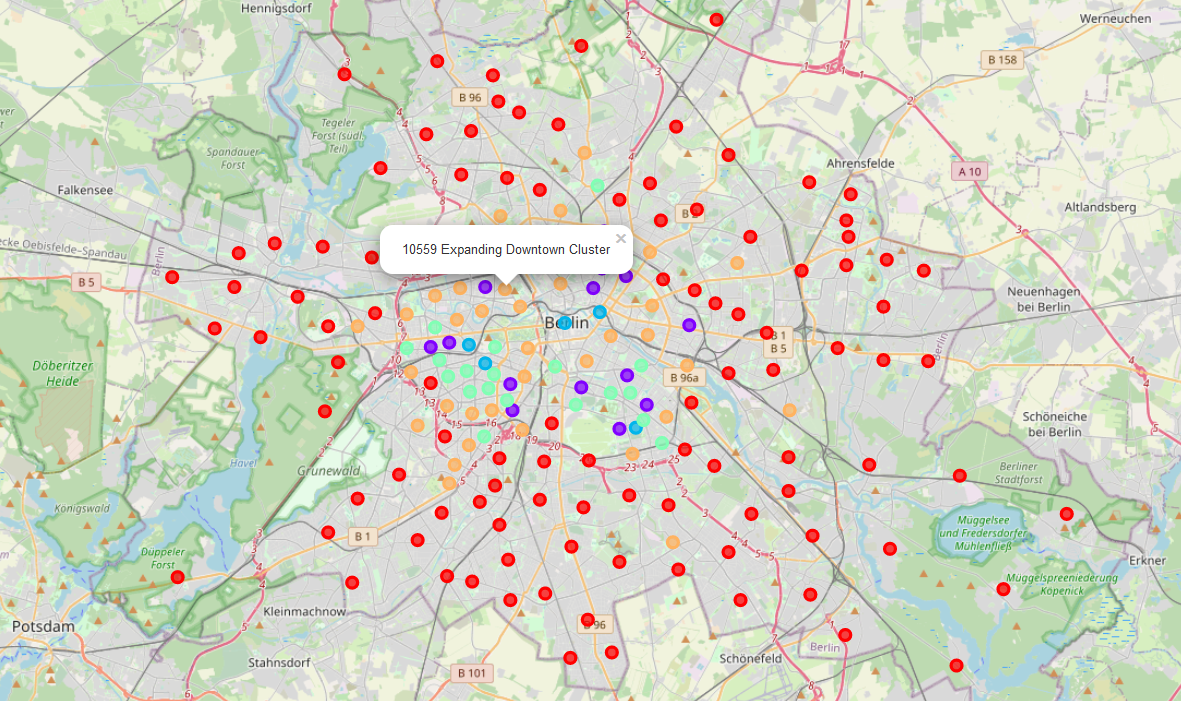

## Conclusion<a name="conclusion"></a>

In this project I analyzed the age composition and venue composition of the neighborhoods, and clustered them using the k-means method into 5 clusters. These clusters share similar characteristics, and the resulting data set can be used to more quickly sift through for-sale listings to rule out areas by their profile using the postal code of the address on the listing. 

Alternatively one may use the map to pick locations of interest, based on the prefered neighborhood profile, then use the postal codes to filter the listings to the areas of interest.